### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m)

print()  

for i in range(m.shape[0]):
    row = m[i]
    mean = 0
    for element in row:
        mean = mean + element/m.shape[1]
    print('mean', i+1 ,'row =', mean)

print()  
    
for i in range(m.shape[1]):
    mean = 0
    for row in m:
        mean = mean + row[i]/m.shape[0]
    print('mean', i+1 ,'column =', mean)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

mean 1 row = 1.5
mean 2 row = 5.5
mean 3 row = 9.5

mean 1 column = 4.0
mean 2 column = 5.0
mean 3 column = 6.0
mean 4 column = 7.0


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print('<u,v> =', np.outer(u, v))

def vect_prod_nest(u, v):
    return np.array([[x*y for y in v]for x in u])

print('<u,v> =', vect_prod_nest(u, v))

def vect_prod_broadcast(u, v):
    u_T = u.reshape(4,1)
    return u_T*v

print('<u,v> =', vect_prod_broadcast(u, v))


<u,v> = [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
<u,v> = [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
<u,v> = [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
m = np.array([np.random.random() for i in range(60)]).reshape((10,6))


def cutoff(M):
    Mcut = np.array([[True if x < 0.1 else False for x in row]for row in M])
    for i in range(M.shape[0]):
        if np.any(Mcut[i]):
            M[i] = np.zeros(M.shape[1])
    return M
print(m)
print()
print(cutoff(m))
 


[[ 0.23314384  0.366436    0.37572859  0.55039525  0.03237505  0.33006476]
 [ 0.41386649  0.6651557   0.15499433  0.04386409  0.33117005  0.87869046]
 [ 0.0411806   0.38256121  0.46144165  0.47211219  0.65226163  0.38319691]
 [ 0.72864624  0.43607243  0.51859454  0.66610815  0.29225708  0.91772805]
 [ 0.41742838  0.15683149  0.1431028   0.65719723  0.30337356  0.6840522 ]
 [ 0.83972182  0.59189483  0.59797717  0.49454817  0.96100091  0.31472456]
 [ 0.1991019   0.42196557  0.38255816  0.37997586  0.12483208  0.39356257]
 [ 0.23939359  0.54316088  0.50711089  0.90124048  0.38657055  0.39031005]
 [ 0.09641661  0.41473157  0.84055446  0.23469872  0.51103893  0.53447306]
 [ 0.34953164  0.00614374  0.84984981  0.82045995  0.11973864  0.03590567]]

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.72864624  0.436072

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[ 0.          0.06346652  0.12693304  0.19039955  0.25386607  0.31733259
  0.38079911  0.44426563  0.50773215  0.57119866  0.63466518  0.6981317
  0.76159822  0.82506474  0.88853126  0.95199777  1.01546429  1.07893081
  1.14239733  1.20586385  1.26933037  1.33279688  1.3962634   1.45972992
  1.52319644  1.58666296  1.65012947  1.71359599  1.77706251  1.84052903
  1.90399555  1.96746207  2.03092858  2.0943951   2.15786162  2.22132814
  2.28479466  2.34826118  2.41172769  2.47519421  2.53866073  2.60212725
  2.66559377  2.72906028  2.7925268   2.85599332  2.91945984  2.98292636
  3.04639288  3.10985939  3.17332591  3.23679243  3.30025895  3.36372547
  3.42719199  3.4906585   3.55412502  3.61759154  3.68105806  3.74452458
  3.8079911   3.87145761  3.93492413  3.99839065  4.06185717  4.12532369
  4.1887902   4.25225672  4.31572324  4.37918976  4.44265628  4.5061228
  4.56958931  4.63305583  4.69652235  4.75998887  4.82345539  4.88692191
  4.95038842  5.01385494  5.07732146  5.14078798  5.2

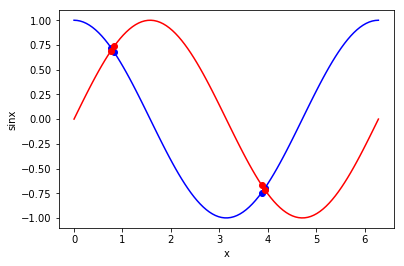

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

a = np.linspace(0, 2*np.pi,100)
print(a)
print()
print(a[::10])
print()

print(a[::-1])

mask = np.array([True if abs(np.sin(x)-np.cos(x))<0.1 else False for x in a])

print()
print(a[mask])


plt.plot(a, np.sin(a), 'r-')
plt.plot(a, np.cos(a), 'b-')
plt.plot(a[mask], np.cos(a[mask]), 'bo')
plt.plot(a[mask], np.sin(a[mask]), 'ro')
plt.xlabel('x')
plt.ylabel('sinx')
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)



In [5]:
 
f = np.arange(1, 11, 1)
h = f.reshape(10,1)
table = f*h

print(table)

trace = 0
anti_diagonal = np.array([])
off1_diagonal = np.array([])
for i in range(10):
    trace = trace + table[i][i]
    anti_diagonal = np.append(anti_diagonal, table[9-i][i])

for i in range(9):
    off1_diagonal = np.append(off1_diagonal, table[i][i+1])

print(trace)
print(anti_diagonal)
print(off1_diagonal)



[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
385
[ 10.  18.  24.  28.  30.  30.  28.  24.  18.  10.]
[  2.   6.  12.  20.  30.  42.  56.  72.  90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:

distances = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

grid = np.abs(distances - distances.reshape(10,1))
print(grid)

grid = (grid*1.6)

print(grid)

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
[[    0.    316.8   484.8  1177.6  1393.6  1880.   2360.   2470.4  3060.8
   3916.8]
 [  316.8     0.    168.    860.8  1076.8  1563.2  2043.2  2153.6  2744.
   3600. ]
 [  484.8   168.      0.    692.8   908.8  1395.2  1875.2  1985.6  2576.
   3432. ]
 [ 1177.6   860.8   692.8     0.    216.    702.4  1182.4  1292.8  1883.2
   2739.2]
 [ 1393.6  1076.8   908.8   216.      0.    486.4   966.4  1076.8  1667.2
   2523.2]
 [ 1880.   1563.2  1395.2   702.4   486.4     

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [7]:
def Prime_Numbers(N):
    NatNum = np.arange(0, N)
    sieve = np.array([True if not (i == 0 or i ==1) else False for i in range(N)])
    for i in range(2, int(np.sqrt(N))):
        for j in range(2, N//2):
            if i*j < N:
                sieve[i*j] = False
    PrimNum = NatNum[sieve]
    return PrimNum

print(Prime_Numbers(100))

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97]


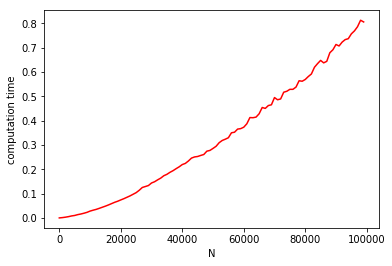

In [8]:
import time

Times = []
for M in range(2, 100000,1000):
    start = time.time()
    Prime_Numbers(M)
    end = time.time()
    CompTime = end - start
    
    Times.append(CompTime)

plt.plot(np.arange(2,100000,1000), Times, 'r-')
plt.xlabel('N')
plt.ylabel('computation time')
plt.show()


In [244]:
import math
def Eratostenes_Sieve(N):
    Num = np.arange(2, N)
    k = 0
    for n in Num:
        if n > 0:
            for i in range(n, int(math.ceil(N/n))):
                    Num[n*i-2] = 0 
    mask = (Num > 0)
    PrimeNum = Num[mask]
    return PrimeNum

print(Eratostenes_Sieve(1000))
math.ceil(100/3)

[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359
 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463
 467 479 487 491 499 503 509 521 523 541 547 557 563 569 571 577 587 593
 599 601 607 613 617 619 631 641 643 647 653 659 661 673 677 683 691 701
 709 719 727 733 739 743 751 757 761 769 773 787 797 809 811 821 823 827
 829 839 853 857 859 863 877 881 883 887 907 911 919 929 937 941 947 953
 967 971 977 983 991 997]


34

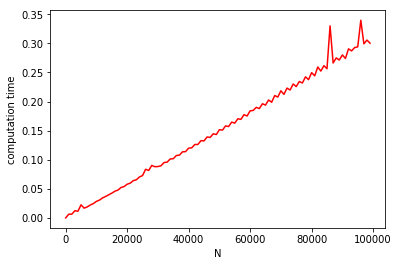

In [215]:
import time

Times = []
for M in range(2, 100000,1000):
    start = time.time()
    Eratostenes_Sieve(M)
    end = time.time()
    CompTime = end - start
    
    Times.append(CompTime)

plt.plot(np.arange(2,100000,1000), Times, 'r-')
plt.xlabel('N')
plt.ylabel('computation time')
plt.show()

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

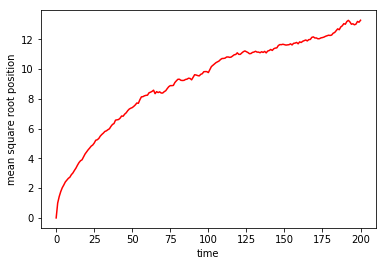

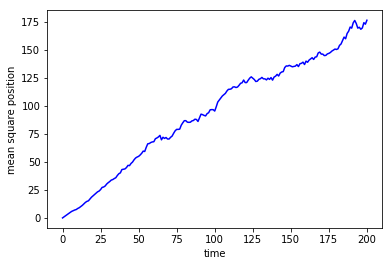

In [48]:

jumps = np.array([[np.random.choice([-1, 1]) for j in range(200)] for i in range(1000)])

distances = np.array([[np.sum(jumps[i][:j]) for j in range(201)] for i in range(200)])

sq_distances = np.square(distances)

meansq_position = np.mean(sq_distances, axis=0)
time = np.arange(0,201)





plt.plot(time, np.sqrt(meansq_position), 'r-')
plt.xlabel('time')
plt.ylabel('mean square root position')
plt.show()

plt.plot(time, meansq_position, 'b-')
plt.xlabel('time')
plt.ylabel('mean square position')
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

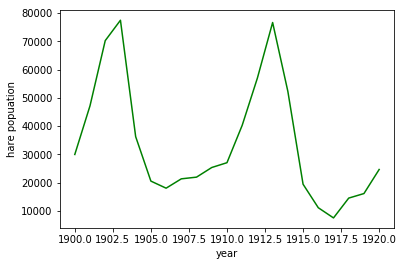

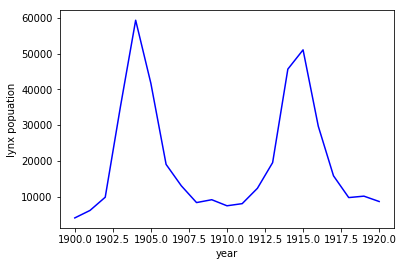

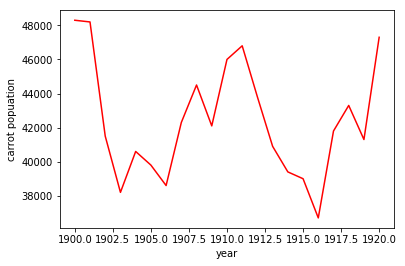

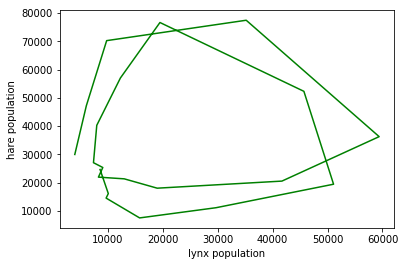

mean hare population =  34080.952381
st dev hare population =  20897.9064581

mean lynx population =  20166.6666667
st dev lynx population =  16254.5915369

mean carrot population =  42400.0
st dev carrot population =  3322.50622558

correlation matrix:
[[ 1.         -0.38917662 -0.02544806 -0.13633321]
 [-0.38917662  1.          0.07189206 -0.01660378]
 [-0.02544806  0.07189206  1.         -0.68057717]
 [-0.13633321 -0.01660378 -0.68057717  1.        ]]

most numerous species in 1900 hare
most numerous species in 1901 hare
most numerous species in 1902 hare
most numerous species in 1903 hare
most numerous species in 1904 lynx
most numerous species in 1905 lynx
most numerous species in 1906 lynx
most numerous species in 1907 hare
most numerous species in 1908 hare
most numerous species in 1909 hare
most numerous species in 1910 hare
most numerous species in 1911 hare
most numerous species in 1912 hare
most numerous species in 1913 hare
most numerous species in 1914 hare
most numerous s

In [69]:
dataset = np.loadtxt("data/populations.txt")

dataset = dataset.transpose()

year = dataset[0]
hare = dataset[1]
lynx = dataset[2]
carrot = dataset[3]

plt.plot(year, hare, 'g-')
plt.xlabel('year')
plt.ylabel('hare popuation')
plt.show()
plt.plot(year, lynx, 'b-')
plt.xlabel('year')
plt.ylabel('lynx popuation')
plt.show()

plt.plot(year, carrot, 'r-')
plt.xlabel('year')
plt.ylabel('carrot popuation')
plt.show()

plt.plot(lynx, hare, 'g-')
plt.xlabel('lynx population')
plt.ylabel('hare population')
plt.show()

mean_hare = np.mean(hare)
mean_lynx = np.mean(lynx)
mean_carrot = np.mean(carrot)

std_hare = np.std(hare)
std_lynx = np.std(lynx)
std_carrot = np.std(carrot)

print("mean hare population = ", mean_hare)
print("st dev hare population = ", std_hare)
print()
print("mean lynx population = ", mean_lynx)
print("st dev lynx population = ", std_lynx)
print()
print("mean carrot population = ", mean_carrot)
print("st dev carrot population = ", std_carrot)
print()
print("correlation matrix:")
print( np.corrcoef(dataset))
print()
for i in range(year.shape[0]):
    if lynx[i]>hare[i]:
        print("most numerous species in", int(year[i]), "lynx")
    else:
        print("most numerous species in", int(year[i]), "hare")


        


Correlation study 1: Linear Correlation between shifted lynx-hare time series, the shift is three years: the eye-estimated distance between subsequent maxima of lynxes and hares

[  4000.   6100.   9800.  35200.  59400.  41700.  19000.  13000.   8300.
   9100.   7400.   8000.  12300.  19500.  45700.  51100.  29700.  15800.
   9700.  10100.   8600.]
[  9800.  35200.  59400.  41700.  19000.  13000.   8300.   9100.   7400.
   8000.  12300.  19500.  45700.  51100.  29700.  15800.   9700.  10100.
   8600.]
[ 30000.  47200.  70200.  77400.  36300.  20600.  18100.  21400.  22000.
  25400.  27100.  40300.  57000.  76600.  52300.  19500.  11200.   7600.
  14600.  16200.  24700.]
[ 30000.  47200.  70200.  77400.  36300.  20600.  18100.  21400.  22000.
  25400.  27100.  40300.  57000.  76600.  52300.  19500.  11200.   7600.
  14600.]


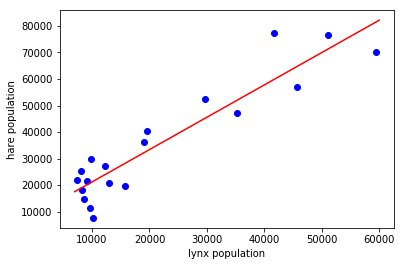

In [28]:
from scipy import stats

lynx_shift = lynx[2:]
hare_shift = hare[:hare.shape[0]-2]

print(lynx)
print(lynx_shift)
print(hare)
print(hare_shift)

A, B, R, p, stderr = stats.linregress(lynx_shift, hare_shift)

x = np.arange(7000,60000,2)
plt.plot(lynx_shift, hare_shift, 'bo')
plt.plot(x, A*x+B, 'r-')
plt.xlabel('lynx population')
plt.ylabel('hare population')
plt.show()



Correlation study 2: Cross correlation functions between time series.

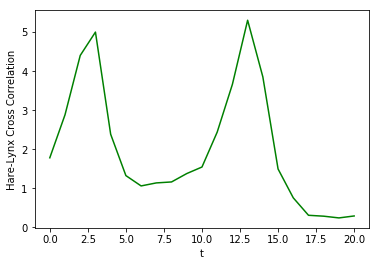

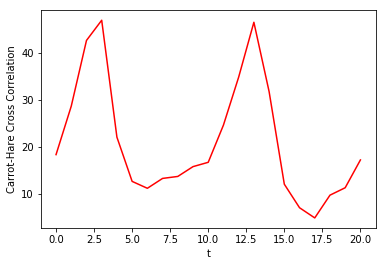

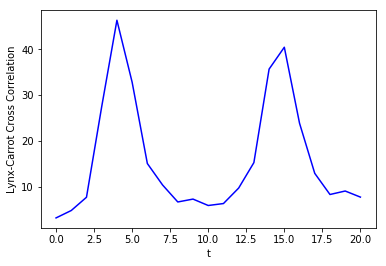

In [67]:
def crosscorr(x,y):
    G = []
    for i in range(0, len(x)):
        g = 0.
        for j in range(0, (len(y)-i)):
            g = g + ((x[i])*(y[j]))/(len(y)-i)
        G.append(g)
    G = G/(np.std(x)*np.std(y))
    return G

HareLynx = crosscorr(hare, lynx)
CarrotHare = crosscorr(hare, carrot)
LynxCarrot = crosscorr(lynx, carrot)


plt.plot(year-1900, HareLynx, 'g-')
plt.xlabel('t')
plt.ylabel('Hare-Lynx Cross Correlation')
plt.show()

plt.plot(year-1900, CarrotHare, 'r-')
plt.xlabel('t')
plt.ylabel('Carrot-Hare Cross Correlation')
plt.show()

plt.plot(year-1900, LynxCarrot, 'b-')
plt.xlabel('t')
plt.ylabel('Lynx-Carrot Cross Correlation')
plt.show()

